#  K-Means Clustering


Реализовать K-Means на наборе данных пингвинов.

1. Примените K-Means к набору данных `пингвины`.
2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?
3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

Используйте следующие числовые атрибуты:
```
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
```

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


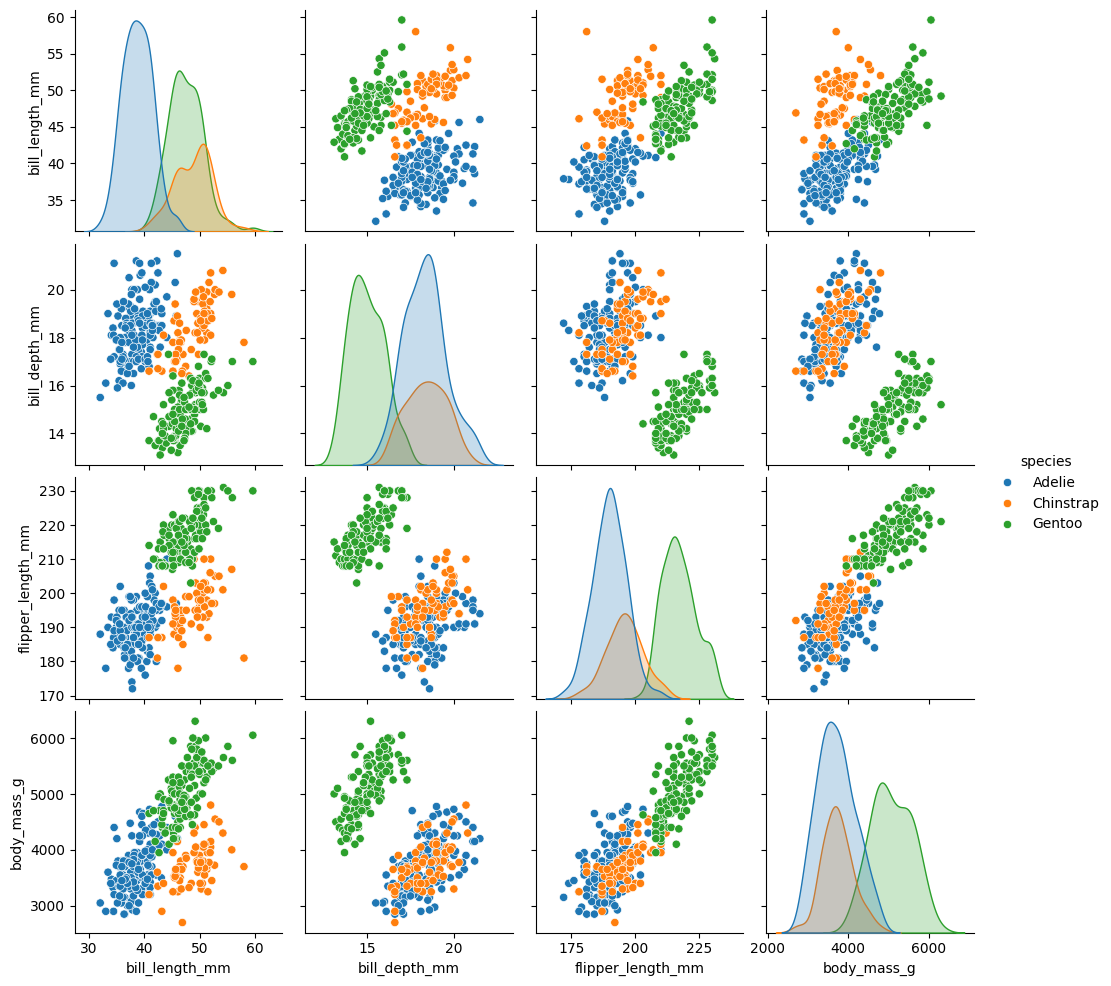

In [61]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")
penguins = penguins.dropna()
penguins.head()

Примените K-Means к набору данных пингвины.

Отделим числовые атрибуты из наших данных

In [63]:
parametr_pingvin = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
new_penguins = penguins[parametr_pingvin]
new_penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


Найдем оптимальное количество кластеров для KMeans с помощью метода локтя



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

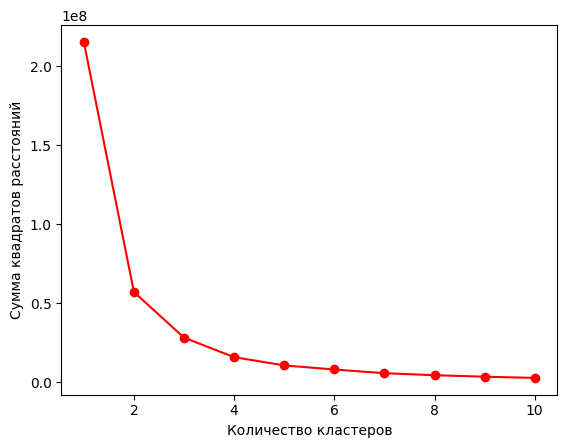

In [64]:
import matplotlib.pyplot as plt

a = []

for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(new_penguins)
    a.append(model.inertia_)

plt.plot(range(1, 11), a, marker='o', color = 'red')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

Оптимальное количество кластеров, исходя из "локтя" = 3

In [80]:
metod = KMeans(n_clusters=3, random_state=42)
metod.fit(new_penguins)
labels = metod.labels_
new_penguins['cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-80-569ae44b86cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_penguins['cluster'] = labels


Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?

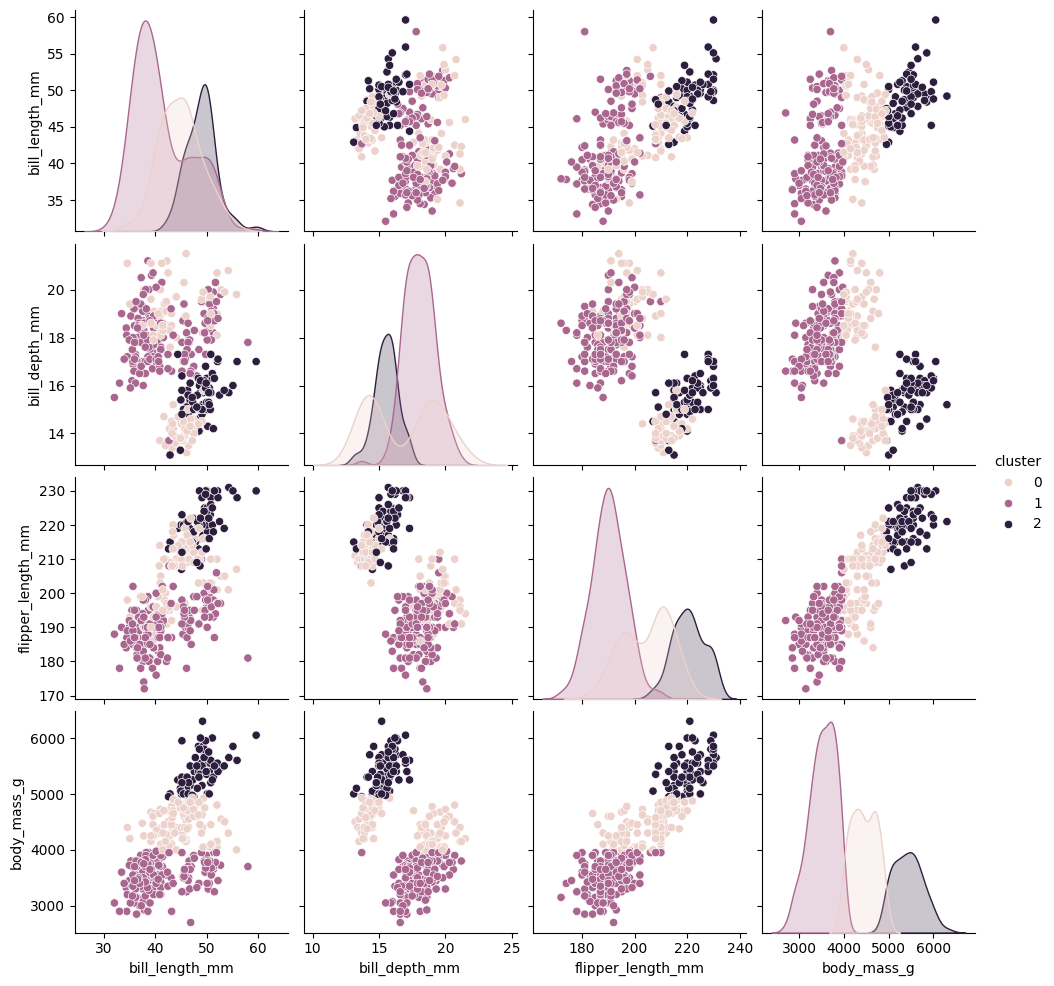

In [81]:
sns.pairplot(data=new_penguins, hue='cluster')
plt.show()

При графическом анализе видно 3 кластера, а также, что некоторые кластеры пересакаются, значит у них есть общие значения

Рассчитайте однородность, полноту и оценку V-measure. Насколько близко сходится кластеризация?

In [88]:
homogen = metrics.homogeneity_score(penguins['species'].cat.codes, labels)
completen = metrics.completeness_score(penguins['species'].cat.codes, labels)
v_measure = metrics.v_measure_score(penguins['species'].cat.codes, labels)

print('Однородность: ', round(homogen, 3))
print('Полнота: ', round(completen, 3))
print('V-мера: ', round(v_measure, 3))

Однородность:  0.401
Полнота:  0.405
V-мера:  0.403


Однородность = 0.401, показывает, что кластеры содержат смешанные данные, их однородность не очень высок.

Полнота = 0.405, что указывает на то, что данные одного класса распределены по нескольким кластерам, полнота умеренная.

V-мера = 0.403, что подтверждает умеренную согласованность кластеризации, то есть баланс между однородностью и полнотой не идеальный.

Результаты метрик однородности, полноты и V-меры показывают, что кластеризация не идеальная, учеренная, кластеры содержат смешанные данные